## Reconstruction of a Sampled Smooth Function

In this short example, we generate a smooth artificial probability field. We then sample the field as independent Bernoulli variables, and then recover the underlying probability field from the sampled data, using binary trees built on the known geometry.

In [1]:
from imports import *

We define the sample probability field to be a $500 \times 500$ matrix $P$. We let $i$ vary uniformly on $\left[0,\frac{\pi}{4}\right]$ and $j$ vary uniformly on $\left[0,2\pi\right]$ over the rows and columns of the matrix respectively. Then we let the entries of the matrix be $P(i,j) = \frac{1}{2} \left(1 + \sin\left(\frac{i+j+2ij}{2}\right)\right)$. We then sample from the field, taking successes to be $+1$ and failures to be $-1$.

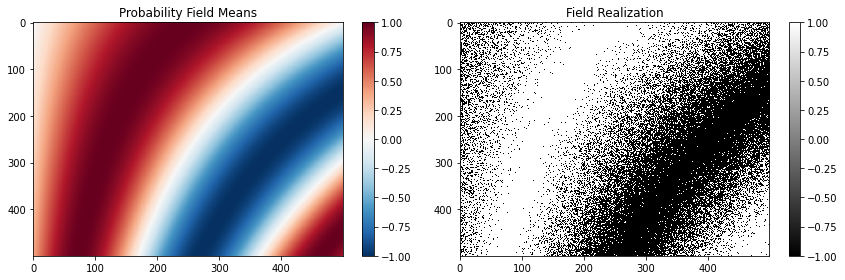

In [3]:
n_rows,n_columns = 500,500
means_matrix = np.zeros([n_rows,n_columns])
for i in range(n_rows):
    for j in range(n_columns):
        ii = i*0.25*np.pi/n_rows
        jj = j*2.0*np.pi/n_columns
        means_matrix[i,j] = np.sin((ii+jj+2*ii*jj)/2.0)*1.0
        
np.random.seed(20140304)
pf = artificial_data.ProbabilityField(means_matrix/2.0+0.5)
orig_data = pf.realize()

fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
cplot(means_matrix,colorbar=True,title="Probability Field Means")
fig.add_subplot(122)
bwplot2(orig_data,colorbar=True,title="Field Realization")
plt.tight_layout()
plt.show()

Next we define binary trees on the rows and columns.

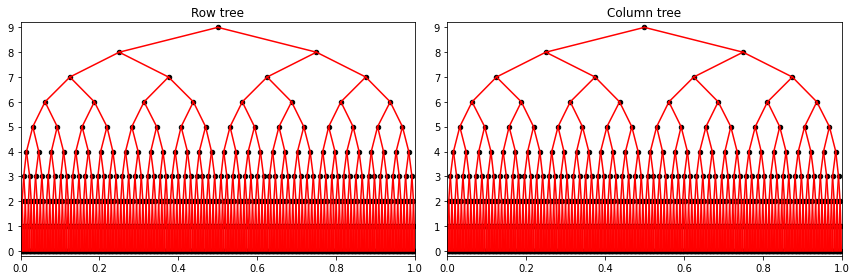

In [4]:
rt = bin_tree_build.random_binary_tree(n_rows,1.0)
ct = bin_tree_build.random_binary_tree(n_columns,1.0)

fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plot_tree(rt,title="Row tree")
fig.add_subplot(122)
plot_tree(ct,title="Column tree")
plt.tight_layout()
plt.show()

We then reconstruct the probability field by expressing the sampled data in the bi-Haar basis implied by these trees, and truncating the coefficients corresponding to folders smaller than $\epsilon$ to 0.

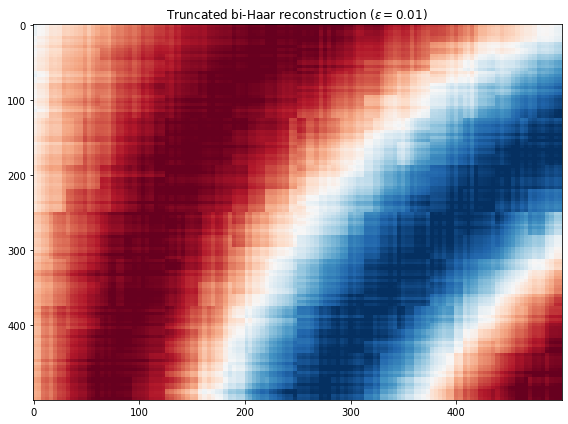

In [5]:
tr = tree_recon.recon_2d_haar_folder_size(orig_data,rt,ct,0.01)
tree_recon.threshold_recon(tr,-1.0,1.0)
fig = plt.figure(figsize=(8,6))
fig.add_subplot(111)
cplot(tr,title="Truncated bi-Haar reconstruction ($\epsilon = 0.01$)")
plt.tight_layout()
plt.show()

We now consider the result of "spin cycling" the reconstruction to remove artifacts. We introduce a slight element of randomness to the tree construction, and generate ten pairs of trees. Then we cross-match the row and column trees with each other, generating 100 pairs of trees, each of which has a slightly perturbed basis. Then we reconstruct as before, and average over the 100 tree-pairs.

In [8]:
row_trees, col_trees = [],[]
spun_recon = np.zeros(orig_data.shape)
for i in range(10):
    row_trees.append(bin_tree_build.random_binary_tree(n_rows,1.2+0.2*i))
    col_trees.append(bin_tree_build.random_binary_tree(n_columns,1.2+0.2*i))
for rt in row_trees:
    for ct in col_trees:
        tr = tree_recon.recon_2d_haar_folder_size(orig_data,rt,ct,0.01)
        tree_recon.threshold_recon(tr,-1.0,1.0)
        spun_recon += tr
spun_recon /= 100.0

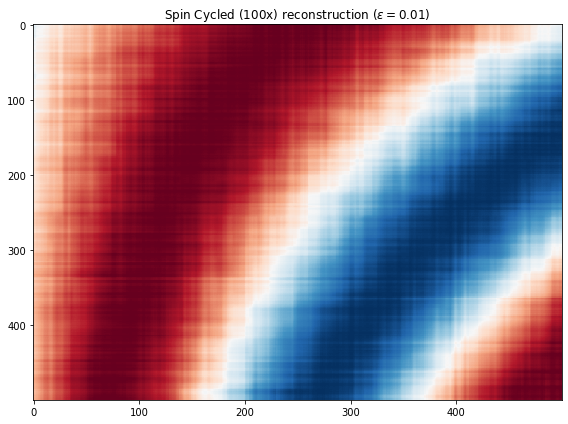

In [9]:
fig = plt.figure(figsize=(8,6))
fig.add_subplot(111)
cplot(spun_recon,title="Spin Cycled (100x) reconstruction ($\epsilon = 0.01$)")
plt.tight_layout()
plt.show() 

Now in this toy example, the reconstruction method here is not particularly efficient. Because the geometry of the image is uniform in each direction, standard signal processing techniques could be applied with good effect. We present this only as a short example of the process of recovering a smooth function from a given geometry. In other settings, the geometry of the rows or columns ("people") might be of higher dimension, or oscillating at different rates. In these cases, these reconstruction techniques continue to work just as well.